# Password Strength Using Natural Language Processing

## Importing Necessary Python Library Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing sqlite3 for Connecting the Database

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r'your_directory/password_data.sqlite')

## Passing Query and Building Dataframe Using Pandas

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


## Doing Data Cleaning

In [7]:
## Checking Whether the data have duplicate rows, missing values, irrelevant rows, checking datatypes, irrelevant columns

In [8]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [9]:
## Here Index is irrelevant column , So I am Droping This!!
data.drop(['index'], axis=1, inplace=True)

In [10]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [11]:
## Removing Duplicates
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [12]:
data.duplicated().sum()

0

In [13]:
## Zero means No duplicates

In [14]:
##Checking for missing values
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,False,False
99998,False,False


In [15]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [16]:
##No missing values

In [17]:
data.dtypes

password    object
strength     int64
dtype: object

In [18]:
##Checking whether some of the rows containing negative value or not because that is the irrelevant data!!

In [19]:
data['strength']

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [20]:
data['strength'].unique()

array([1, 2, 0])

In [21]:
##Strength contain only 1,2,0, So it means no negative value is there No irrelevant row.

## Performing Semantic Analysis

In [22]:
## how many password textual actually holds only numeric characters??
## how many password textual actually holds only upper-case characters??
## how many password textual actually holds alpha-numeric characters??
## how many password textual actually holds title-case characters??
## how many password textual actually holds some special special characters??

In [23]:
data.columns

Index(['password', 'strength'], dtype='object')

In [24]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [25]:
data['password'][0]

'zxe870819'

In [26]:
type(data['password'][0])

str

In [27]:
##Checking how many password textual actually holds only numeric characters??

In [28]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [29]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [30]:
data[data['password'].str.isnumeric()].shape

(26, 2)

In [31]:
##Checking how many password textual actually holds only upper-case characters??

In [32]:
data['password'].str.isupper()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [33]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [34]:
data[data['password'].str.isupper()].shape

(1506, 2)

In [35]:
data['password'].str.isalpha()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [36]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [37]:
data[data['password'].str.isalpha()].shape

(50, 2)

In [38]:
## how many password textual actually holds alpha-numeric characters??

In [39]:
data['password'].str.isalnum()

0         True
1         True
2         True
3        False
4         True
         ...  
99995     True
99996     True
99997     True
99998     True
99999     True
Name: password, Length: 100000, dtype: bool

In [40]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [41]:
data[data['password'].str.isalnum()].shape

(97203, 2)

In [42]:
##From this we conclude that 97.203% people set their password as alphanumeric.

In [43]:
## how many password textual actually holds title-case characters??

In [44]:
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [45]:
data[data['password'].str.istitle()].shape

(932, 2)

In [46]:
## how many password textual actually holds some special special characters??
## Actually, There is no inbuilt function for that. So, we have to do the coding from the scratch.

In [47]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [48]:
import string

In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [51]:
data['password'].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

## Feature Engineering

In [52]:
data['length'] = data['password'].str.len()

In [53]:
data['length']

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: length, Length: 100000, dtype: int64

In [54]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [55]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [56]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [57]:
data['lowercase_freq'] = np.round(data['password'].apply(freq_lowercase), 3)
data['uppercase_freq'] = np.round(data['password'].apply(freq_uppercase), 3)
data['digit_freq'] = np.round(data['password'].apply(freq_numerical_case), 3)

In [58]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174


In [59]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [60]:
data['special_case_freq'] = np.round(data['password'].apply(freq_special_case), 3)

In [61]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_case_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1


In [62]:
data['special_case_freq'] = data['special_case_freq']/data['length']

In [63]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_case_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


## Performing Descriptive Analysis

In [64]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_case_freq'],
      dtype='object')

In [65]:
data[['length', 'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [66]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_case_freq']
for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [67]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_case_freq'],
      dtype='object')

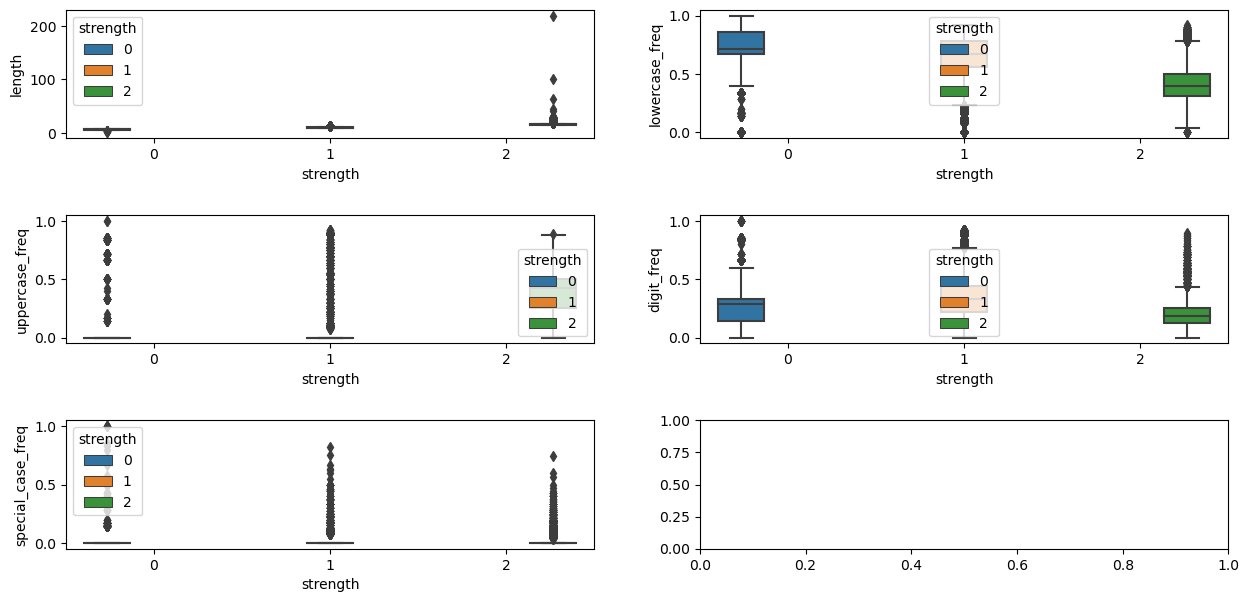

In [68]:
fig, ((axis1, axis2), (axis3, axis4), (axis5, axis6)) = plt.subplots(3, 2, figsize=(15, 7))

sns.boxplot(x='strength', y='length', hue='strength', ax=axis1, data=data)
sns.boxplot(x='strength', y='lowercase_freq', hue='strength', ax=axis2, data=data)
sns.boxplot(x='strength', y='uppercase_freq', hue='strength', ax=axis3, data=data)
sns.boxplot(x='strength', y='digit_freq', hue='strength', ax=axis4, data=data)
sns.boxplot(x='strength', y='special_case_freq', hue='strength', ax=axis5, data=data)

plt.subplots_adjust(hspace=0.6)
plt.savefig('./assets/ Strength Vs Various_Factors.png')

## Let's Apply Feature Importance

In [69]:
#Using violin plot because it is combination of boxplot and distplot

In [70]:
def get_dist(data, feature):
    plt.subplot(1,2,1)
    sns.violinplot(x='strength', y=feature, data=data)
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature], color='red', label="0", hist=False)
    sns.distplot(data[data['strength']==1][feature], color='blue', label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color='green', label="2", hist=False)
    plt.legend()
    plt.show()

In [71]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

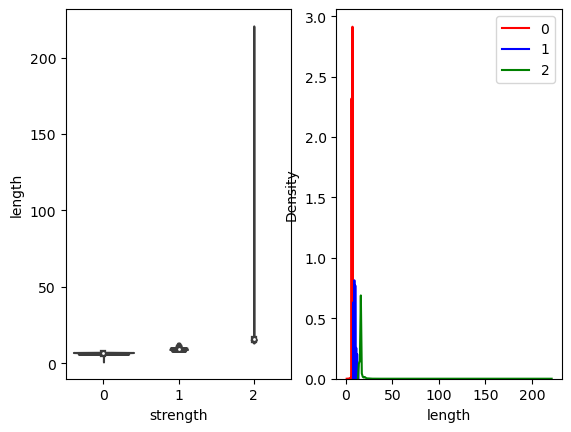

In [72]:
get_dist(data, "length")

In [73]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_case_freq'],
      dtype='object')

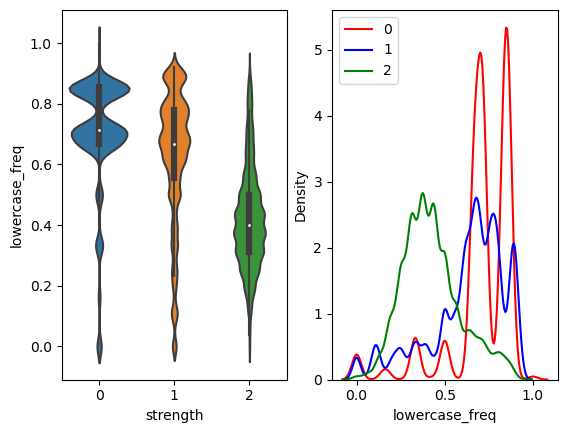

In [74]:
get_dist(data, "lowercase_freq")

## Applying TF-IDF on data

In [75]:
def get_dist(data, feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x='strength', y=feature, data=data)
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature], color='red', label="0", hist=False)
    sns.distplot(data[data['strength']==1][feature], color='blue', label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color='green', label="2", hist=False)
    plt.legend()
    plt.show()

In [76]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_case_freq'],
      dtype='object')

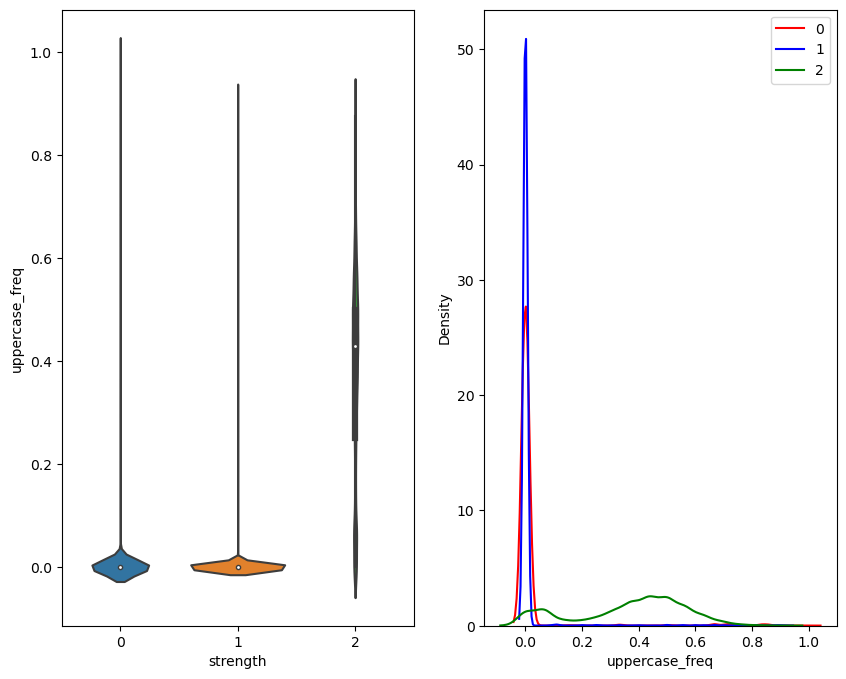

In [77]:
get_dist(data, "uppercase_freq")

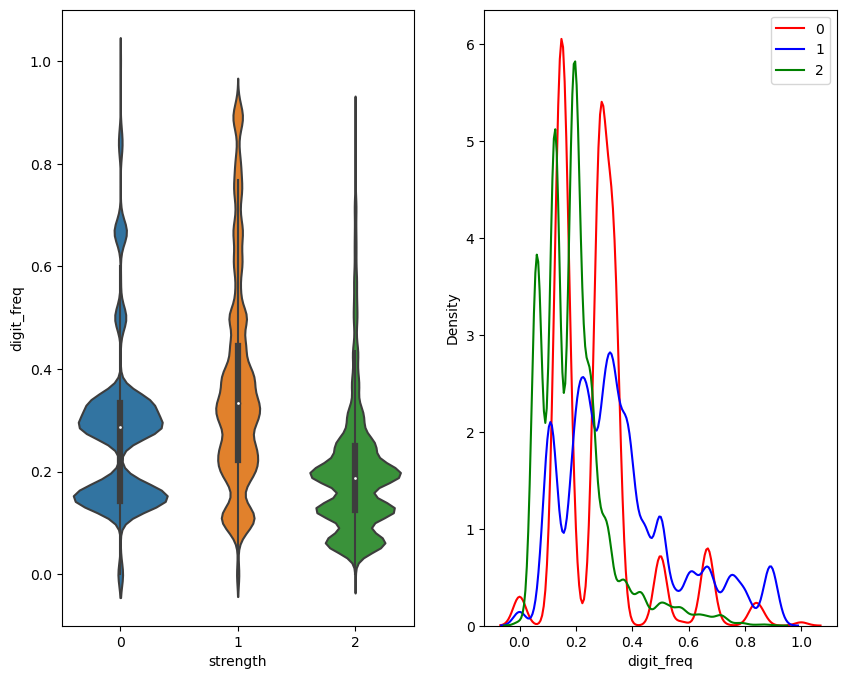

In [78]:
get_dist(data, "digit_freq")

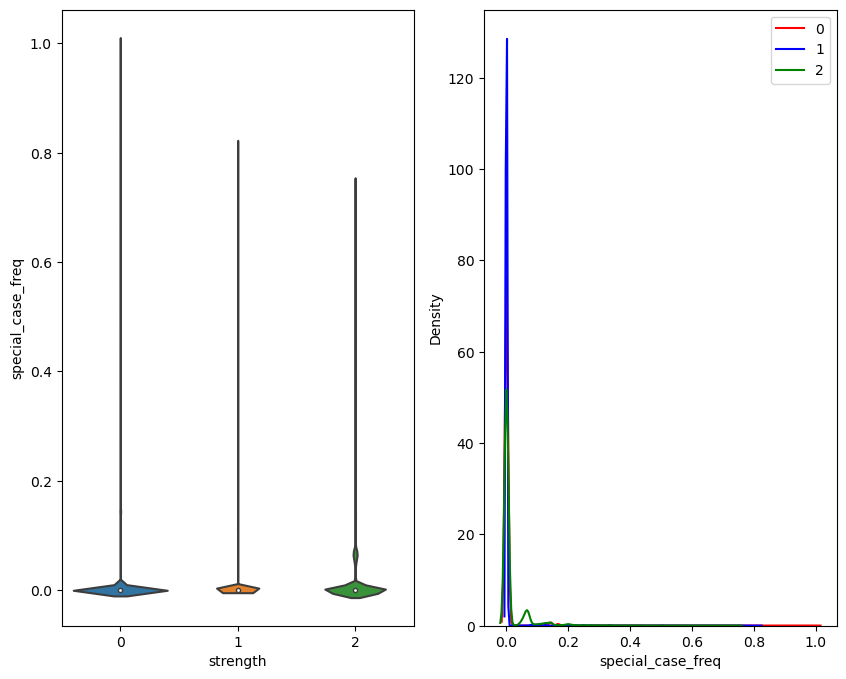

In [79]:
get_dist(data, "special_case_freq")

In [80]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_case_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [81]:
## Converting text data ----> vector using Natural Language Processing Techniques
## The main aim is to convert password into vector

In [82]:
dataframe = data.sample(frac=1)

In [83]:
#importing packages help to perform Natural Language Processing Algorithms

In [84]:
#It's all about TF-IDF Vectorization

In [85]:
x= list(dataframe['password'])

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
vectorizer = TfidfVectorizer(analyzer="char")

In [88]:
X = vectorizer.fit_transform(x)

In [89]:
X.shape

(100000, 99)

In [90]:
dataframe['password'].shape

(100000,)

In [91]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [92]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.36790364, 0.42564668, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.41505206, 0.        , 0.        , 0.28592257,
       0.21504811, 0.        , 0.        , 0.25545786, 0.        ,
       0.45547139, 0.21767877, 0.        , 0.        , 0.        ,
       0.        , 0.25121552, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [94]:
dataframe['password']

27027      12ONTHELINE12
81832            tadziu1
52606           ifpzhav3
1742         mohmehmed22
90836    650VAnaKEJyluJO
              ...       
67034         cdkeygen12
75008            tipysa7
45594         catalina61
59832           cywaz853
31255           sica2012
Name: password, Length: 100000, dtype: object

In [95]:
len(vectorizer.get_feature_names_out())

99

In [96]:
df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

## Applying Machine Learning Algorithm on Data

In [97]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_case_freq'],
      dtype='object')

In [98]:
df2['length'] = dataframe['length']

In [99]:
df2['lowercase_freq'] = dataframe['lowercase_freq']

In [100]:
df2.head(4)

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783


In [101]:
## For Machine Learning, There are two types of features: 1)Independent Feature 2)Dependent Feature
## Strength is Dependent feature
## Here strength depends upon the what the actually password is?? ie, On Independent feature.

In [102]:
## For Machine Learning you want two type of data : 1)Training Data 2)Testing Data

## Training Data is for train the machine learning algorithm so that it can all all type of relationship.

## By using testing data we can do prediction with the help of the trained model.

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
y = dataframe['strength']

In [105]:
# 20% data for testing stuff!!

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [107]:
X_train.shape

(80000, 101)

In [108]:
y_train.shape

(80000,)

In [109]:
## Machine Learning is all about regression, classification and clustering

In [110]:
## Building Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial') #Multiclass is used when there is more than two independent classes

In [111]:
## Training Model
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [112]:
## Doing Prediction
y_pred = clf.predict(X_test)

In [113]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [114]:
from collections import Counter
Counter(y_pred)

Counter({1: 16544, 2: 2002, 0: 1454})

In [115]:
## We have to convert the user entered password in the the (1,101) because the train data also in this format only

In [116]:
## 99 features are from TF-IDF and two feature (length, lowercase_freq)

In [117]:
## Testing via sample data

In [118]:
password = "%@123abcd"

In [119]:
sample_array = np.array([password])

In [120]:
sample_matrix = vectorizer.transform(sample_array)

In [121]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [122]:
sample_matrix.toarray().shape

(1, 99)

In [123]:
## The dimension is (1,99) We have to normalise this in the (1,101).
## The other features are length and lowercase_freq

In [124]:
## Manual Sample Testing

In [125]:
len(password)

9

In [126]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [127]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [128]:
np.append(sample_matrix.toarray(), (9,0.444)).shape

(101,)

In [129]:
np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [130]:
np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101).shape

(1, 101)

In [131]:
new_matrix = np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101)

In [132]:
clf.predict(new_matrix)

array([0])

In [133]:
## Now Automate the Sample Testing 
## Building model

In [134]:
def predict():
    password = input("Enter the password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    length_password = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()]) / len(password)
    new_matrix2 = np.append(sample_matrix.toarray(), (length_password, length_normalised_lowercase)).reshape(1, 101)
    result = clf.predict(new_matrix2)
    if result == 0:
        return "Password is weak"
    elif result == 1:
        return "Password is normal"
    else:
        return "Password is strong"

In [135]:
predict()

Enter the password : paRas@1709


'Password is strong'

## Checking Accuracy of the model

In [136]:
## importing necessary package
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [137]:
accuracy_score(y_test,y_pred)

0.8038

In [138]:
confusion_matrix(y_test,y_pred)

array([[  758,  1954,     3],
       [  627, 13740,   421],
       [   69,   850,  1578]])

In [139]:
## In the above array, the diagonal values are only true prediction and others are false prediction

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.28      0.36      2715
           1       0.83      0.93      0.88     14788
           2       0.79      0.63      0.70      2497

    accuracy                           0.80     20000
   macro avg       0.71      0.61      0.65     20000
weighted avg       0.78      0.80      0.79     20000

